# Matplotlib and Seaborn

## Tidy Data

A Tidy Dataset is a tabular dataset where:
- Each variable is a column
- Each observation is a row
- Each type of observational unit is a table

## Bar Charts

A bar chart depicts the distribution of a categorical variable.

### Bar Chart using Seaborn
- A basic bar chart of frequencies can be created through the use of seaborn's countplot function.
    seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
    

In [1]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


(807, 14)
   id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   
5   6   charizard              1     1.7    90.5              240   fire   
6   7    squirtle              1     0.5     9.0               63  water   
7   8   wartortle              1     1.0    22.5              142  water   
8   9   blastoise              1     1.6    85.5              239  water   
9  10    caterpie              1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  pois

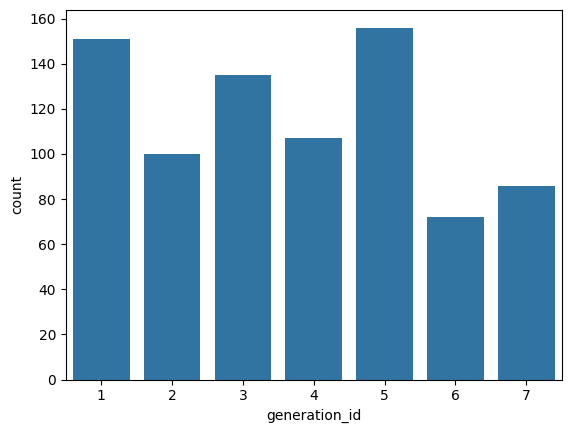

In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
print(pokemon.head(10))

# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');

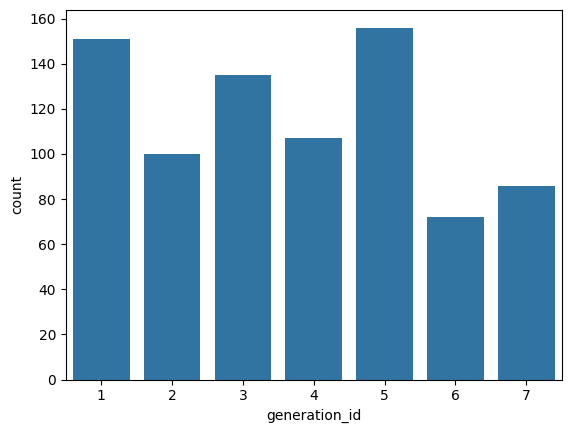

In [3]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

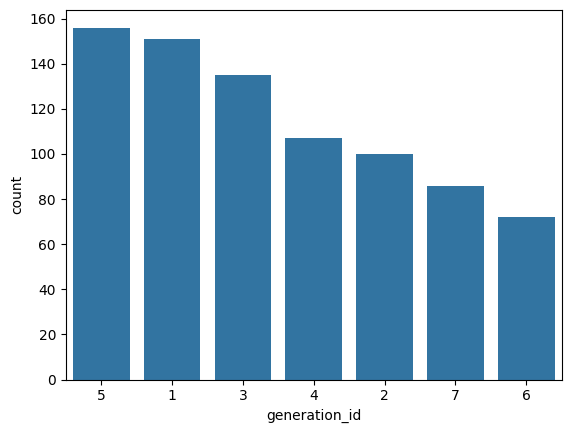

In [4]:
# Get the counts of unique values in the 'generation_id' column
gen_order = pokemon['generation_id'].value_counts().index

# Use the `order` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

### Bar Chart using Matplotlib

- matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)

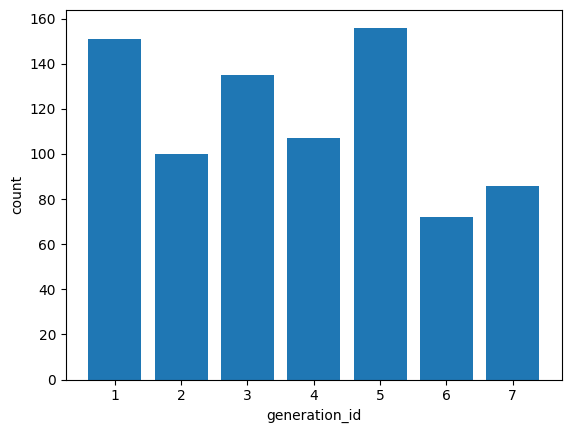

In [5]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

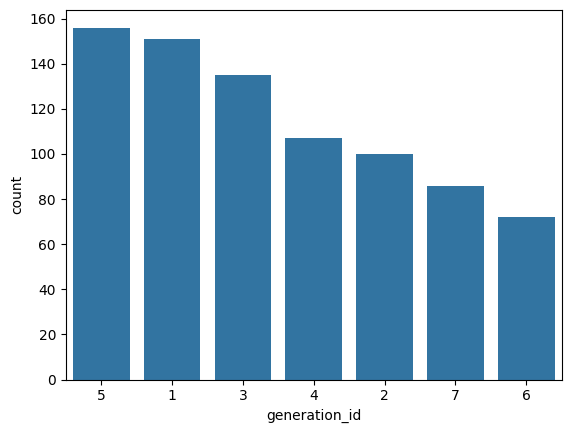

In [6]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'flying')])

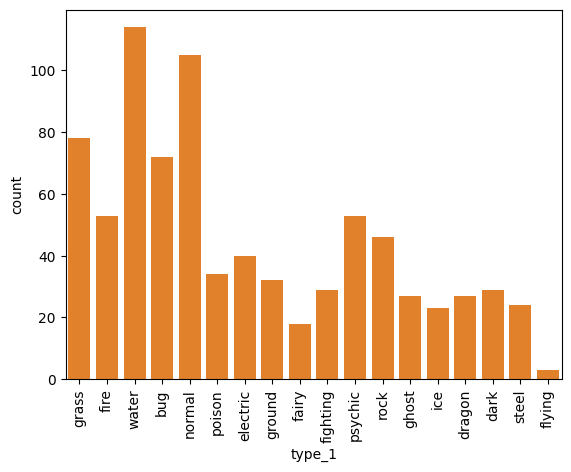

In [10]:
# Plot the Pokemon type on a Vertical bar chart
base_color = sb.color_palette()[1]
sb.countplot(data=pokemon, x='type_1', color=base_color) ;

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

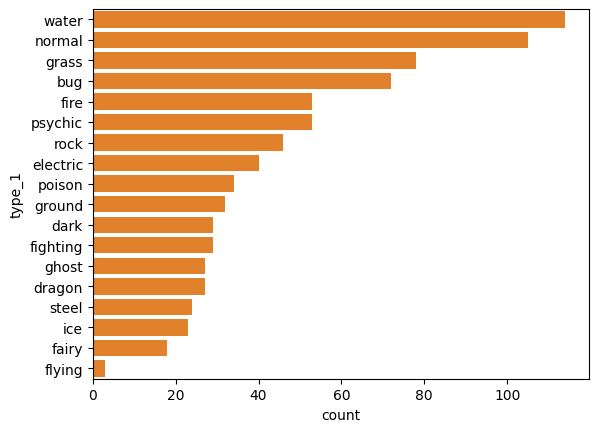

In [11]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

## Absolute vs. Relative Frequency
- Absolute frequency: The number of times a particular value for a variable (or a class) has been observed to occur.
- Relative frequency: The proportion (fraction) of times a particular value for a variable (or a class) has been observed to occur.

### Demonstrate data wrangling, and plot a horizontal bar chart

- pandas.DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)
    -  Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    - It is essential to understand the parameters involved:
        - id_vars - It is a tuple representing the column(s) to use as identifier variables.
        - value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).
        - var_name - It is a name of the new column.
        - value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.
  

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [18]:
# Select the 'id', and 'species' columns from pokemon.
# Remove the 'type_1' and 'type_2' columns from pokemon.
# Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'.
# Add a new column 'type' that stores the actual values in the 'type_1' and 'type_2' columns.

pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(30)
#pkmn_types.shape


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [14]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts


type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64

In [15]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object', name='type')

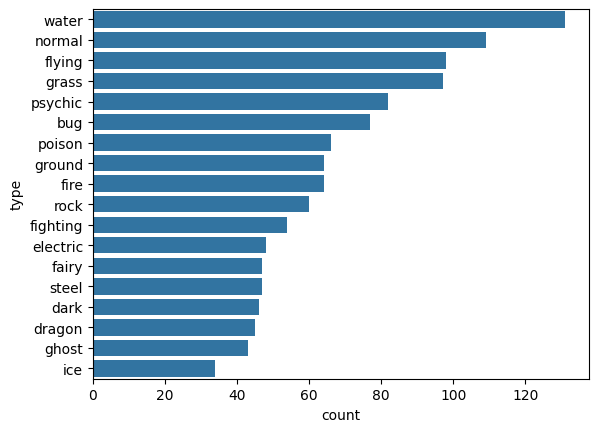

In [16]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);